In [1]:
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import warnings
import numpy as np

import argparse

mlp.rcParams["figure.facecolor"] = "white"
warnings.filterwarnings("ignore")

In [36]:
dataset_name = 'stl10_30'
#input_path = f'/Users/chengjiaying/scikit-activeml/tutorials/csv/{dataset_name}_csv.csv'
input_path = f'/mnt/stud/home/jcheng/scikit-activeml/tutorials/csv_2/{dataset_name}_csv.csv'
dataframe = pd.read_csv(input_path, index_col=0, on_bad_lines='skip')

qs_names = dataframe['qs'].unique()
print(qs_names.__class__)

<class 'numpy.ndarray'>


In [37]:
query_strategy_names = dataframe['qs'].unique()
print(query_strategy_names)

['RandomSampling' 'UncertaintySampling' 'DiscriminativeAL' 'CoreSet'
 'TypiClust' 'Badge']


In [38]:
result_score = dataframe.groupby(['qs', 'batch_size', 'n_cycles', 'step'])['score'].agg(['mean', 'std']).set_axis(['s_mean', 's_std'], axis=1)
result_time = dataframe.groupby(['qs', 'batch_size', 'n_cycles', 'step'])['time'].agg(['mean', 'std']).set_axis(['t_mean', 't_std'], axis=1)
typiclust = result_time.loc['TypiClust']
print(result_time)

                                                t_mean     t_std
qs                  batch_size n_cycles step                    
Badge               16         30       0     0.129519  0.001253
                                        1     0.307582  0.005517
                                        2     0.262253  0.010817
                                        3     0.256650  0.009984
                                        4     0.257138  0.009642
...                                                ...       ...
UncertaintySampling 16         30       25    0.264280  0.045693
                                        26    0.252343  0.051309
                                        27    0.237504  0.052033
                                        28    0.238703  0.054596
                                        29    0.243667  0.051522

[180 rows x 2 columns]


In [39]:
# input_path = f'/Users/chengjiaying/scikit-activeml/tutorials/csv/{dataset_name}_csv.csv'
input_path = f'/mnt/stud/home/jcheng/scikit-activeml/tutorials/csv_2/{dataset_name}_csv.csv'
dataframe = pd.read_csv(input_path, index_col=0, on_bad_lines='skip')
dataframe = dataframe.dropna()

query_strategy_names = dataframe['qs'].unique()

result_time = dataframe.groupby(['qs', 'batch_size', 'n_cycles', 'step'])['time'].agg(['mean', 'std']).set_axis(
    ['t_mean', 't_std'], axis=1)
b = result_time.loc['Badge']
qs_result_t_mean = b['t_mean'].to_numpy()
print(qs_result_t_mean)

[0.1295186  0.30758204 0.26225343 0.25665026 0.2571383  0.2718503
 0.27130375 0.30679603 0.29481797 0.28596878 0.29839354 0.2988698
 0.30671487 0.35050364 0.32051821 0.32708607 0.34027801 0.34199467
 0.34122763 0.37879553 0.35248003 0.35278106 0.35501761 0.35948124
 0.36454716 0.4439178  0.36774778 0.36959    0.37924161 0.37278323]


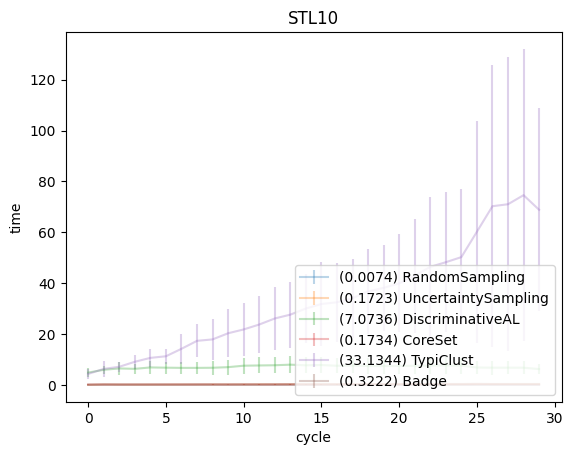

In [40]:
for qs_name in query_strategy_names:
    qs_result_t = result_time.loc[qs_name]
    qs_result_t_mean = qs_result_t['t_mean'].to_numpy()
    qs_result_t_std = qs_result_t['t_std'].to_numpy()

    plt.errorbar(np.arange(len(qs_result_t_mean)), qs_result_t_mean, qs_result_t_std,
                 label=f"({np.mean(qs_result_t_mean):.4f}) {qs_name}", alpha=0.3)

plt.title('STL10')
plt.legend(loc='lower right')
plt.xlabel('cycle')
plt.ylabel('time')
# output_path = f'{dataset_name}_time.png'
output_path = f'/mnt/stud/home/jcheng/scikit-activeml/tutorials/result/{dataset_name}_time.pdf'
plt.savefig(output_path)